<a href="https://colab.research.google.com/github/lwerth/SI/blob/master/InsightCrime_HAN_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Preprocessing and other stuff


In [1]:
#code taken from https://www.kaggle.com/hsankesara/news-classification-using-han/notebook
#and
#https://colab.research.google.com/drive/1Q2tf4wSQRVq_opjWAYzpbYpPpzcnDaje?usp=sharing
#and
#https://colab.research.google.com/drive/1Q2tf4wSQRVq_opjWAYzpbYpPpzcnDaje?usp=sharing

In [2]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer,  text_to_word_sequence
from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints
from keras.callbacks import Callback, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding, Input, Dense, LSTM, GRU, Bidirectional, TimeDistributed, Dropout
from keras import backend as K
from keras import optimizers
from keras.models import Model
import nltk
import re
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score
from nltk import tokenize
import seaborn as sns
import json
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0
Running on TPU  ['10.32.150.250:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.32.150.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.32.150.250:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [4]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatibl|e with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape = (input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape = (input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape = (input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]
        

In [5]:
from sklearn.utils import shuffle

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
%cd /content/drive
!ls


/content/drive
'My Drive'


In [8]:
import pandas as pd

In [9]:
max_features=200000
max_senten_len=246
max_senten_num=100
embed_size=300 # I changed this from 100 to 300
VALIDATION_SPLIT = 0.3

Let's read in the csv file created from the spider crawl. Make sure encoding is utf-8 and we are dropping rows with no observations. 

In [10]:
#df = pd.read_csv('My Drive/Projects/InSightCrime/Insight_Crime/scrape/insight/InsightCrime_News.csv', ).dropna()
df = pd.read_csv('My Drive/Projects/InSightCrime/Insight_Crime/scrape/insight/InsightCrime_News.csv', encoding='utf-8').dropna()



Review the number of "unique" tags per article. some tags could still be repeated because of their list-like nature.

In [11]:
len(df.tags.unique())

5365

In [12]:
df.head()

,author,content,date,tags,title,type,url
0,Max Radwin,Protests broke out in Bolivia last year in the...,2020-03-09,"Bolivia,Cocaine,Elites and Organized Crime,Inf...",Bolivia Investigations Target Members of Evo M...,Analysis,https://www.insightcrime.org/news/analysis/bol...
1,Chris Dalby,Increased security of containers entering the ...,2020-02-27,"Brazil,Cocaine,European Organized Crime,Securi...",Can Port of Antwerp Truly Stem Cocaine Enterin...,Analysis,https://www.insightcrime.org/news/analysis/por...
2,Chris Dalby and Charlotte Dierkes,The sight of children bearing arms in Guerrero...,2020-02-17,"Homicides,Mexico",Los Ardillos Continue Terrorizing Indigenous C...,Analysis,https://www.insightcrime.org/news/analysis/los...
3,Maria Fernanda Ramírez,Helena is one of the many former FARC members ...,2020-02-04,"Colombia,FARC,FARC peace,Gender and Organized ...",Former FARC Guerrillas Recognized as Victims o...,Brief,https://www.insightcrime.org/news/brief/colomb...
4,Maria Alejandra Navarrete,"Luis Del Río Jiménez, alias “el Tío,” or “Seño...",2020-01-21,"Colombia,Elites and Organized Crime",Was ‘Señor T’ One of Colombia’s Invisible Drug...,Analysis,https://www.insightcrime.org/news/analysis/sen...


In [13]:
df['text'] = df['title'] +'. ' +df['content']
df.head()

,author,content,date,tags,title,type,url,text
0,Max Radwin,Protests broke out in Bolivia last year in the...,2020-03-09,"Bolivia,Cocaine,Elites and Organized Crime,Inf...",Bolivia Investigations Target Members of Evo M...,Analysis,https://www.insightcrime.org/news/analysis/bol...,Bolivia Investigations Target Members of Evo M...
1,Chris Dalby,Increased security of containers entering the ...,2020-02-27,"Brazil,Cocaine,European Organized Crime,Securi...",Can Port of Antwerp Truly Stem Cocaine Enterin...,Analysis,https://www.insightcrime.org/news/analysis/por...,Can Port of Antwerp Truly Stem Cocaine Enterin...
2,Chris Dalby and Charlotte Dierkes,The sight of children bearing arms in Guerrero...,2020-02-17,"Homicides,Mexico",Los Ardillos Continue Terrorizing Indigenous C...,Analysis,https://www.insightcrime.org/news/analysis/los...,Los Ardillos Continue Terrorizing Indigenous C...
3,Maria Fernanda Ramírez,Helena is one of the many former FARC members ...,2020-02-04,"Colombia,FARC,FARC peace,Gender and Organized ...",Former FARC Guerrillas Recognized as Victims o...,Brief,https://www.insightcrime.org/news/brief/colomb...,Former FARC Guerrillas Recognized as Victims o...
4,Maria Alejandra Navarrete,"Luis Del Río Jiménez, alias “el Tío,” or “Seño...",2020-01-21,"Colombia,Elites and Organized Crime",Was ‘Señor T’ One of Colombia’s Invisible Drug...,Analysis,https://www.insightcrime.org/news/analysis/sen...,Was ‘Señor T’ One of Colombia’s Invisible Drug...


Check for reduncancies and replace them.

The accents are not counted as redundant here

In [14]:
df.tags.unique()

array(['Bolivia,Cocaine,Elites and Organized Crime,Infographics',
       'Brazil,Cocaine,European Organized Crime,Security Policy,Suriname',
       'Homicides,Mexico', ...,
       'Colombia,Oficina de Envigado,Sebastián (oficina)',
       'Cartel de Juárez,Cartel de Sinaloa,El Chapo,Homicidios,México',
       'Costa Rica,Lavado de dinero,Nicaragua'], dtype=object)

In [15]:
df.tags = df.tags.map(lambda x: "Juarez" if x == "Juárez" else x)
df.tags = df.tags.map(lambda x: "Elites and Organized Crime" if x == "Élites y Crimen Organizado" else x)
df.tags = df.tags.map(lambda x: "Mexico" if x == "México" else x)
df.tags = df.tags.map(lambda x: "Brazil" if x == "Brasil" else x)
df.tags = df.tags.map(lambda x: "Human Rights" if x == "Derechos Humanos" else x)
df.tags = df.tags.map(lambda x: "Peru" if x == "Perú" else x)
df.tags = df.tags.map(lambda x: "Sinaloa Cartel" if x == "Cartel de Sinaloa" else x)
df.tags = df.tags.map(lambda x: "FARC peace" if x == "Paz FARC" else x)

In [16]:
len(df.tags.unique())

5361

In [17]:
df['cats'] = df.tags.str.split(",", expand=False)

In [18]:
df.cats[0]
#len(df.cats)

['Bolivia', 'Cocaine', 'Elites and Organized Crime', 'Infographics']

In [19]:
df.cats = df.cats.map(lambda x: "Elites and Organized Crime" if x == "Élites y Crimen Organizado" else x)
df.cats = df.cats.map(lambda x: "Mexico" if x == "México" else x)
df.cats = df.cats.map(lambda x: "Brazil" if x == "Brasil" else x)
df.cats = df.cats.map(lambda x: "Human Rights" if x == "Derechos Humanos" else x)
df.cats = df.cats.map(lambda x: "Peru" if x == "Perú" else x)
df.cats = df.cats.map(lambda x: "Sinaloa Cartel" if x == "Cartel de Sinaloa" else x)
df.cats = df.cats.map(lambda x: "FARC peace" if x == "Paz FARC" else x)

In [20]:
df.tail()

,author,content,date,tags,title,type,url,text,cats
15764,Elyssa Pachico,SHARE\nLa captura de Daniel “El Loco” Barrera ...,2012-09-19,"El Loco Barrera,Venezuela",El arresto del ‘Loco Barrera’ muestra a Venezu...,Análisis,https://es.insightcrime.org/noticias/analisis/...,El arresto del ‘Loco Barrera’ muestra a Venezu...,"[El Loco Barrera, Venezuela]"
15765,Daniela Castro,SHARE\nEl informe\nelaborado por el inspector ...,2012-09-20,"Frontera EU/México,Tráfico de armas",Veredicto sobre la Operación ‘Rápido y Furioso’,Noticias del día,https://es.insightcrime.org/noticias/noticias-...,Veredicto sobre la Operación ‘Rápido y Furioso...,"[Frontera EU/México, Tráfico de armas]"
15766,Daniela Castro,SHARE\nFalsos periodistas de la cadena Televis...,2012-09-20,"Costa Rica,Lavado de dinero,Nicaragua",Falsos Periodistas Acusados por los Delitos de...,Noticias del día,https://es.insightcrime.org/noticias/noticias-...,Falsos Periodistas Acusados por los Delitos de...,"[Costa Rica, Lavado de dinero, Nicaragua]"
15767,Andres Ortiz,"SHARE\nEn lo corrido del año, la Secretaría de...",2012-09-21,Mexico,Aproximadamente 8.000 Detenidos por Narcotráfi...,Noticias del día,https://es.insightcrime.org/noticias/noticias-...,Aproximadamente 8.000 Detenidos por Narcotráfi...,[Mexico]
15768,Andres Ortiz,SHARE\nLuego de retirarse del país en 1994 por...,2012-09-21,Uruguay,La DEA Vuelve a Pisar Uruguay,Noticias del día,https://es.insightcrime.org/noticias/noticias-...,La DEA Vuelve a Pisar Uruguay. SHARE\nLuego de...,[Uruguay]


In [21]:
df = df[['title', 'text', 'cats','tags','content']]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15655 entries, 0 to 15768
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    15655 non-null  object
 1   text     15655 non-null  object
 2   cats     15655 non-null  object
 3   tags     15655 non-null  object
 4   content  15655 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


##Genres

I'm going to edit out the genres tab because it only has 253 rows when we need 15655. I though this would help with binarization but it does not.

In [23]:
# select a column as series and then convert it into a column
list_of_names = df.cats.to_list()
#list_of_names

In [24]:
all_genres = sum(list_of_names, [])
len(set(all_genres))

253

In [25]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

all_genres_df.head

<bound method NDFrame.head of                           Genre  Count
0                       Bolivia    541
1                       Cocaine    141
2    Elites and Organized Crime    792
3                  Infographics    368
4                        Brazil    696
..                          ...    ...
248         Cartel los Perrones     12
249             Cartel de Texis     43
250             Víctor Carranza      8
251             Pijarbey Farfan      4
252         Sebastián (oficina)      1

[253 rows x 2 columns]>

Figure out how to merge genres into the dataframe

In [26]:
df.genres = all_genres_df['Genre']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Here is the genres error, the All_genres_df is being assigned to df[genres] but they are not the same length nor in the same order. So 1 through 253 are being assigned to that index position in df but it's not correct.

In [27]:
# df.genres = df.genres.map(lambda x: "Elites and Organized Crime" if x == "Élites y Crimen Organizado" else x)
# df.genres = df.genres.map(lambda x: "Mexico" if x == "México" else x)
# df.genres = df.genres.map(lambda x: "Brazil" if x == "Brasil" else x)
# df.genres = df.genres.map(lambda x: "Human Rights" if x == "Derechos Humanos" else x)
# df.genres = df.genres.map(lambda x: "Peru" if x == "Perú" else x)
# df.genres = df.genres.map(lambda x: "Sinaloa Cartel" if x == "Cartel de Sinaloa" else x)
# df.genres = df.genres.map(lambda x: "FARC peace" if x == "Paz FARC" else x)

In [28]:
# all_genres_df.Genre = all_genres_df.Genre.map(lambda x: "Elites and Organized Crime" if x == "Élites y Crimen Organizado" else x)
# all_genres_df.Genre = all_genres_df.Genre.map(lambda x: "Mexico" if x == "México" else x)
# all_genres_df.Genre = all_genres_df.Genre.map(lambda x: "Brazil" if x == "Brasil" else x)
# all_genres_df.Genre = all_genres_df.Genre.map(lambda x: "Human Rights" if x == "Derechos Humanos" else x)
# all_genres_df.Genre = all_genres_df.Genre.map(lambda x: "Peru" if x == "Perú" else x)
# all_genres_df.Genre = all_genres_df.Genre.map(lambda x: "Sinaloa Cartel" if x == "Cartel de Sinaloa" else x)
# all_genres_df.Genre = all_genres_df.Genre.map(lambda x: "FARC peace" if x == "Paz FARC" else x)

In [29]:
#len(df.tags.unique())
# len(all_genres_df.Genre.unique())

In [30]:
# g = all_genres_df.nlargest(columns="Count", n = 100) 
# plt.figure(figsize=(12,15)) 
# ax = sns.barplot(data=g, x= "Count", y = "Genre") 
# ax.set(ylabel = 'Count') 
# plt.show()

##Cleaning Text

We can start to clean the text

In [31]:
def clean_text(text):
    text = re.sub(r'[?|!|\'|"|#]',r'',text)
    text = re.sub(r'[.|,|)|(|\|/]',r' ',text)
    text = text.strip()
    text = text.replace("\n"," ")
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    #text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [32]:
df['clean_text'] = df['text'].apply(lambda x: clean_text(x))


In [33]:
df.head()

,title,text,cats,tags,content,clean_text
0,Bolivia Investigations Target Members of Evo M...,Bolivia Investigations Target Members of Evo M...,"[Bolivia, Cocaine, Elites and Organized Crime,...","Bolivia,Cocaine,Elites and Organized Crime,Inf...",Protests broke out in Bolivia last year in the...,bolivia investigations target members of evo m...
1,Can Port of Antwerp Truly Stem Cocaine Enterin...,Can Port of Antwerp Truly Stem Cocaine Enterin...,"[Brazil, Cocaine, European Organized Crime, Se...","Brazil,Cocaine,European Organized Crime,Securi...",Increased security of containers entering the ...,can port of antwerp truly stem cocaine enterin...
2,Los Ardillos Continue Terrorizing Indigenous C...,Los Ardillos Continue Terrorizing Indigenous C...,"[Homicides, Mexico]","Homicides,Mexico",The sight of children bearing arms in Guerrero...,los ardillos continue terrorizing indigenous c...
3,Former FARC Guerrillas Recognized as Victims o...,Former FARC Guerrillas Recognized as Victims o...,"[Colombia, FARC, FARC peace, Gender and Organi...","Colombia,FARC,FARC peace,Gender and Organized ...",Helena is one of the many former FARC members ...,former farc guerrillas recognized as victims o...
4,Was ‘Señor T’ One of Colombia’s Invisible Drug...,Was ‘Señor T’ One of Colombia’s Invisible Drug...,"[Colombia, Elites and Organized Crime]","Colombia,Elites and Organized Crime","Luis Del Río Jiménez, alias “el Tío,” or “Seño...",was ‘señor t’ one of colombia’s invisible drug...


Now we review stopwords

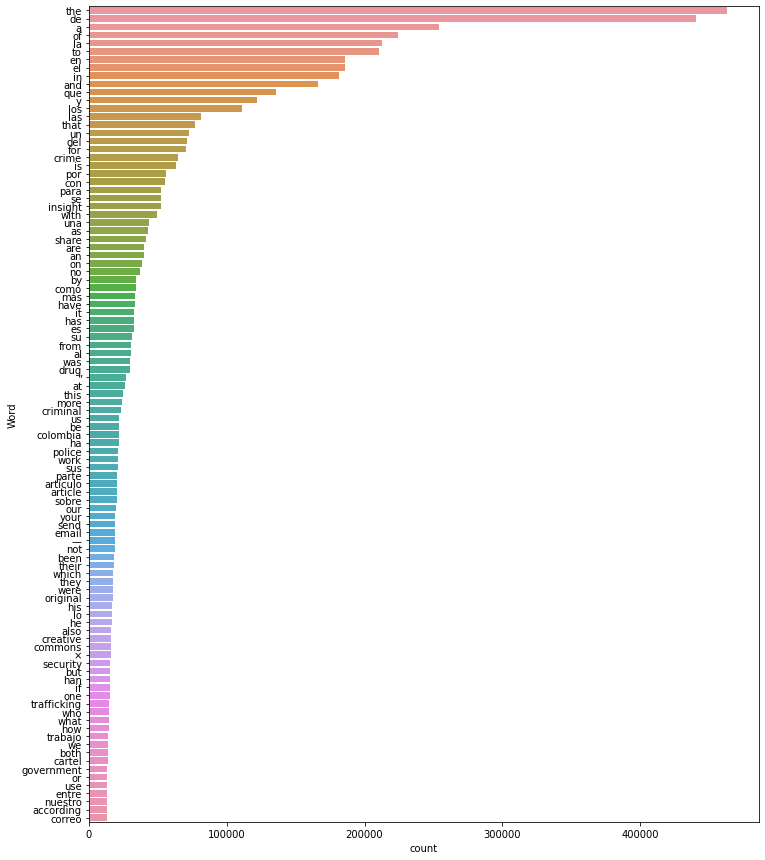

In [34]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(df['clean_text'], 100)

Now let's drop stop-words in english and spanish. 

---



I looked at some of the more frequent words and deleted more stop words, including "insight crime", "link", "website", and "comment" among others. Lets see if this will help.


In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words_es = set(stopwords.words("spanish"))
#stop_words_es

In [37]:
stop_words = stop_words.union(stop_words_es)
#stop_words

In [38]:


newStopWords = ('crime','insight', 'share','article','articulo', 'x', '-', 'email','si', '000', 'link','click','copy',
                  'website','comment','comments','aqui','reporte','creative','commons','please','readers','correo','electronico',
                  'send','would','thoughts', 'report','said','bottom','could','comentarios', '—', 'X', '"')

stop_words = stop_words.union(newStopWords)
#stop_words

In [39]:
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['clean_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))

In [40]:
df.clean_text

0        bolivia investigations target members evo mora...
1        port antwerp truly stem cocaine entering europ...
2        ardillos continue terrorizing indigenous commu...
3        former farc guerrillas recognized victims sexu...
4        ‘señor t’ one colombia’s invisible drug traffi...
                               ...                        
15764    arresto ‘loco barrera’ muestra venezuela refug...
15765    veredicto operación ‘rápido furioso’ informe e...
15766    falsos periodistas acusados delitos narcotráfi...
15767    aproximadamente 8 detenidos narcotráfico méxic...
15768    dea vuelve pisar uruguay luego retirarse país ...
Name: clean_text, Length: 15655, dtype: object

## Setting up HAN - 1

In [41]:
df.tail()

,title,text,cats,tags,content,clean_text
15764,El arresto del ‘Loco Barrera’ muestra a Venezu...,El arresto del ‘Loco Barrera’ muestra a Venezu...,"[El Loco Barrera, Venezuela]","El Loco Barrera,Venezuela",SHARE\nLa captura de Daniel “El Loco” Barrera ...,arresto ‘loco barrera’ muestra venezuela refug...
15765,Veredicto sobre la Operación ‘Rápido y Furioso’,Veredicto sobre la Operación ‘Rápido y Furioso...,"[Frontera EU/México, Tráfico de armas]","Frontera EU/México,Tráfico de armas",SHARE\nEl informe\nelaborado por el inspector ...,veredicto operación ‘rápido furioso’ informe e...
15766,Falsos Periodistas Acusados por los Delitos de...,Falsos Periodistas Acusados por los Delitos de...,"[Costa Rica, Lavado de dinero, Nicaragua]","Costa Rica,Lavado de dinero,Nicaragua",SHARE\nFalsos periodistas de la cadena Televis...,falsos periodistas acusados delitos narcotráfi...
15767,Aproximadamente 8.000 Detenidos por Narcotráfi...,Aproximadamente 8.000 Detenidos por Narcotráfi...,[Mexico],Mexico,"SHARE\nEn lo corrido del año, la Secretaría de...",aproximadamente 8 detenidos narcotráfico méxic...
15768,La DEA Vuelve a Pisar Uruguay,La DEA Vuelve a Pisar Uruguay. SHARE\nLuego de...,[Uruguay],Uruguay,SHARE\nLuego de retirarse del país en 1994 por...,dea vuelve pisar uruguay luego retirarse país ...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15655 entries, 0 to 15768
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       15655 non-null  object
 1   text        15655 non-null  object
 2   cats        15655 non-null  object
 3   tags        15655 non-null  object
 4   content     15655 non-null  object
 5   clean_text  15655 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [43]:
df['text'].head()

0    Bolivia Investigations Target Members of Evo M...
1    Can Port of Antwerp Truly Stem Cocaine Enterin...
2    Los Ardillos Continue Terrorizing Indigenous C...
3    Former FARC Guerrillas Recognized as Victims o...
4    Was ‘Señor T’ One of Colombia’s Invisible Drug...
Name: text, dtype: object

In [44]:
#categories = df['genres']
# AB added this here

text = df['text']
len(text)

15655

In [45]:
cates = df.groupby('tags')
print("total categories:", cates.ngroups)
print(cates.size())

total categories: 5361
tags
AUC,Autodefensas,Colombia                                                         1
AUC,Barrio 18,Colombia,El Salvador,El Salvador gang truce,MS13                    1
AUC,Barrio 18,Colombia,El Salvador,MS13,Tregua entre pandillas en El Salvador     1
AUC,Colombia                                                                     39
AUC,Colombia,Derechos Humanos                                                     1
                                                                                 ..
Élites y Crimen Organizado,Reforma judicial                                       1
Élites y Crimen Organizado,República Dominicana                                   1
Élites y Crimen Organizado,Surinam                                                2
Élites y Crimen Organizado,Venezuela                                             29
Élites y Crimen Organizado,Venezuela,Walid Makled                                 1
Length: 5361, dtype: int64


In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
import re
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

In [48]:
paras = []
labels = []
texts = []

In [49]:
sent_lens = []
sent_nums = []
for idx in range(df.text.shape[0]):
    text = clean_str(df.text.iloc[idx])
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    sent_nums.append(len(sentences))
    for sent in sentences:
        sent_lens.append(len(text_to_word_sequence(sent)))
    paras.append(sentences)


In [50]:
print(len(texts))
print(len(text))

15655
1117


*Theres* an error at line 469 I think in the df. I didn't troubleshoot, I just uncommented out the #text line, ran it, commented it again, ran the line above, and then ran it and it worked...

The above code didn't run the first time I ran it, then ran when I tried again...

In [51]:
# sns.distplot(sent_lens, bins=200)
# plt.show()

In [52]:
# sns.distplot(sent_nums)
# plt.show()

In [53]:
tokenizer = Tokenizer(num_words=max_features, oov_token=True)
tokenizer.fit_on_texts(text)

In [54]:
data = np.zeros((len(texts), max_senten_num, max_senten_len), dtype='int32')
for i, sentences in enumerate(paras):
    for j, sent in enumerate(sentences):
        if j< max_senten_num:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                try:
                    if k<max_senten_len and tokenizer.word_index[word]<max_features:
                        data[i,j,k] = tokenizer.word_index[word]
                        k=k+1
                        
                except:
                    #print(word)
                    pass

In [55]:
data.shape

(15655, 100, 246)

In [56]:
word_index = tokenizer.word_index
print('Total %s unique tokens.' % len(word_index))

Total 40 unique tokens.


Categories are coming from the genres column, which has NaN's. 

The get_dummies is converting a column with single categories into binary. I think you should use multilabel binarizer instead. 

I switched categories from cats to tags. I used the multilable binizer before and it worked well. Somehow the model just didn't run. - LW

In [57]:
categories = df['cats']

# #categories = hash(categories)
# labels = pd.get_dummies(categories)
# #len(labels)

In [58]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(categories)

# transform target variable
labels = multilabel_binarizer.transform(categories)

In [59]:
print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', labels.shape)

Shape of data tensor: (15655, 100, 246)
Shape of labels tensor: (15655, 253)


In [60]:
#xtrain, xval, ytrain, yval = train_test_split(data, labels, test_size=0.1, random_state=9)

In [61]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# xtrain = sc.fit_transform(xtrain.reshape(1,-1))
# xtest=sc.transform(xval)
# ytrain = sc.fit_transform(ytrain.ravel())
# ytest=sc.transform(yval)

In [62]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
#labels = labels[indices].values
#
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]



print('Number of positive and negative reviews in traing and validation set')
print(y_train.sum(axis=0).tolist())
print(y_val.sum(axis=0).tolist())

Number of positive and negative reviews in traing and validation set
[75, 8, 2, 14, 0, 452, 175, 78, 3, 412, 9, 12, 21, 70, 386, 322, 488, 26, 16, 32, 52, 66, 3, 0, 6, 6, 1, 139, 92, 81, 22, 195, 32, 13, 101, 36, 11, 18, 9, 95, 2, 216, 93, 80, 45, 2064, 7, 36, 8, 110, 84, 183, 7, 21, 55, 100, 39, 7, 27, 150, 21, 43, 9, 23, 51, 4, 8, 236, 210, 24, 31, 76, 4, 29, 85, 68, 275, 7, 2, 188, 11, 4, 0, 5, 31, 45, 14, 6, 1052, 112, 6, 550, 5, 68, 166, 103, 146, 65, 87, 561, 167, 3, 7, 43, 14, 13, 1, 94, 40, 49, 69, 16, 3, 26, 1, 925, 57, 71, 19, 55, 26, 17, 1, 55, 41, 361, 249, 866, 150, 88, 137, 28, 109, 185, 259, 8, 5, 10, 89, 62, 8, 39, 106, 116, 75, 98, 20, 180, 3, 5, 59, 27, 2, 10, 531, 5, 21, 43, 15, 8, 52, 1856, 6, 41, 45, 95, 12, 73, 229, 7, 915, 70, 75, 159, 8, 10, 88, 42, 35, 17, 20, 152, 4, 5, 85, 67, 317, 32, 164, 9, 379, 204, 2, 1, 33, 1, 240, 186, 438, 163, 220, 47, 10, 3, 131, 52, 80, 168, 37, 2, 1, 7, 1, 1, 62, 448, 33, 80, 312, 46, 5, 6, 6, 6, 2, 34, 31, 12, 2, 78, 82, 94, 53, 

## HAN MODEL

In [63]:
REG_PARAM = 1e-13
l2_reg = regularizers.l2(REG_PARAM)

In [64]:
import os


In [65]:
# import zipfile
# from google.colab import drive

# zip_ref = zipfile.ZipFile("My Drive/Spring 2020/ECE 523 - Machine Learning/ECE_523_FP-(1)/glove.6B.zip", 'r')
# zip_ref.extractall("/tmp")
# #zip_ref.close()

In [66]:
span_DIR = "My Drive/Projects/InSightCrime/Insight_Crime/models/data/SBW-vectors-300-min5.txt"
#GLOVE_DIR = "My Drive/Data/Bogota/SBW-vectors-300-min5.txt/SBW-vectors-300-min5.txt"

embeddings_index = {}
f = open(span_DIR)
for line in f:
    try:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except:
        print(word)
        pass
f.close()
print('Total %s word vectors.' % len(embeddings_index))

Total 1000654 word vectors.


In [67]:
embedding_matrix = np.zeros((len(word_index) + 1, embed_size)) # I changed the embed size from 100 to 300
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
absent_words = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        absent_words += 1
print('Total absent words are', absent_words, 'which is', "%0.2f" % (absent_words * 100 / len(word_index)), '% of total words')

Total absent words are 9 which is 22.50 % of total words


Using the SBW-vectors-300-min5 I got 9 absent words which is 22.50 % of total words. Glove proved to be very big.

This was the previous absent words using GloVe: Total absent words are 89746 which is 65.75 % of total words

I was able to fix things in the data and label code so I switched the embed size back to 100. I think this will help. Total absent words are 3 which is 7.5% of the total words.

I'll run this with GloVe and then with the spanish vectors

---------------------------------

This is the absent words using pre-trained for Spanish, see https://www.kaggle.com/rtatman/pretrained-word-vectors-for-spanish. 

Total absent words are 14 which is 32.56 % of total words

This is probably because I increased the embedding size from 100 to 300 to match the SBW shape.

In [69]:
embedding_layer = Embedding(len(word_index) + 1,embed_size,weights=[embedding_matrix], input_length=max_senten_len, trainable=False)


In [70]:
#figure out how to customize this for multiclass labels

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model example
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model example
# history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
# loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

In [71]:
word_input = Input(shape=(max_senten_len,), dtype='float32')
word_sequences = embedding_layer(word_input)
word_lstm = Bidirectional(LSTM(150, return_sequences=True, kernel_regularizer=l2_reg))(word_sequences)
word_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(word_lstm)
word_att = AttentionWithContext()(word_dense)
wordEncoder = Model(word_input, word_att)

sent_input = Input(shape=(max_senten_num, max_senten_len), dtype='float32')
sent_encoder = TimeDistributed(wordEncoder)(sent_input)
sent_lstm = Bidirectional(LSTM(150, return_sequences=True, kernel_regularizer=l2_reg))(sent_encoder)
sent_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(sent_lstm)
sent_att = Dropout(0.5)(AttentionWithContext()(sent_dense))
preds = Dense(253, activation='sigmoid')(sent_att) # changed (again) from 253 to 69
model = Model(sent_input, preds)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics = [tf.keras.metrics.AUC(),f1_m,precision_m, recall_m]) #metrics=[tf.keras.metrics.AUC()]) # changed to f1 from previous change acc to AUC, and adam optimizer to sgd

In [72]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1) #, batch_size=100 this was eating up all my ram, the default seems to run well. I also changed the runtime to gpu.

train = model.evaluate(x_train, y_train, verbose = 1)
score = model.evaluate(x_val, y_val, verbose =0)

print('Train accuracy:', train[1])
print('Valication loss:', score[0])
print('Validation accuracy:', score[1])

loss, accuracy, f1_score, precision, recall = model.evaluate(x_val, y_val, verbose=0)

Train on 10959 samples, validate on 4696 samples
Epoch 1/1
10959/10959 [==============================] - 1263s 115ms/step
Train accuracy: 0.8407410979270935
Valication loss: 11.930186846796454
Validation accuracy: 0.8444649577140808


In [77]:
print("loss:", loss)
print("accuracy:", accuracy) 
print("f1 score:", f1_score) 
print("precision:",  precision) 
print("recall:", recall)

loss: 11.930186846796454
accuracy: 0.8456321954727173
f1 score: 0.13464294373989105
precision: 0.07993198186159134
recall: 0.42965492606163025


## Binarization

Now we get to the fun stuff. I'm using multi label binarizer to convert our cats into binary indicators. 

I use the tags category instead of the cats category to compare lists to string.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['cats'])

# transform target variable
y = multilabel_binarizer.transform(df['cats'])

In [ ]:
y


Instead of 5 "1"s accross, the ones are scattered around. Let's see how this applies to our TP-IDF.

In [ ]:
y[1]

I use TF-IDF to vectorize our content. Max features set to 10,000. This will help weigh properly common and sparse words. 

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(df['clean_text'], y, test_size=0.1, random_state=9)

In [ ]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

Below we define the model. For this example a Logistic Regression is used and a One vs Rest Classifier to determine the relevance of each tag to the article. Thus, for each of the 253 cats it performs an LR and determines the probability of each cat being assigned that specific article, if above a .5 threshold then that is 1 of the labels assigned. This allows for multiple labels being assigned to a single document. 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [ ]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

Let's fit the model. 

In [ ]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

In [ ]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

Let's see what the model predicted for an article. It's smaller than our 'cats' model.

In [ ]:
y_pred[1]

I'm not very good at reading binary so here's the predicted cats. 

In [ ]:
multilabel_binarizer.inverse_transform(y_pred)[1]

And here are the actual cats, boom spot on!

In [ ]:
multilabel_binarizer.inverse_transform(yval)[1]

In [ ]:
f1_score(yval, y_pred, average="micro")

Now let's see how well it does on multiple articles and we'll ask it to print the title of the article for some context. 

In [ ]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [ ]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Author: ", df['author'][k], "\nPredicted tags: ", infer_tags(xval[k])), print("Actual tags: ",df['cats'][k], "\n")

##Added K-NN Review

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.7MB/s 


Let's use a multi-label k-nearest neighbor algorithm. 

In [ ]:
#import nltk

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [ ]:
classifier_new = MLkNN(k=10)
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(xtrain_tfidf).toarray()
y_train = lil_matrix(ytrain).toarray()
x_test = lil_matrix(xval_tfidf).toarray()


In [ ]:
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)

## LDA Approach

Just to understand the data better I implement an LDA. 

In [ ]:
%tensorflow_version 1.15.0
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import decomposition
import numpy

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.0`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['clean_text'])



# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(x_train)
xvalid_count =  count_vect.transform(x_val)

AttributeError: ignored

Below I use latent Dirichlet allocation to extract topic summaries for the entire data set. 

In [ ]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()



NameError: ignored

In [ ]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

Below I print out the topic summaries, to get an idea of what the text is about and to find any missing stopwords to add to the dictionary. 

In [ ]:
topic_summaries

## Extra Testing/Accuracy Tries

In [ ]:

# example making new class predictions for a classification problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

y_prob = model.predict(x_val)
y_classes = y_prob.argmax(axis = -1)
#predicted_labels = sorted(labels)
#y_classes

# rounded_predictions = model.predict_classes(x_val, verbose=0)
# rounded_predictions[1]

# y_val[1]

array([45, 45, 45, ..., 45, 45, 45])

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_val, axis=1)
rounded_labels[1]

115

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm = confusion_matrix(rounded_labels, y_classes)
cm
print(metrics.classification_report(rounded_labels, y_classes))

In [ ]:
# train = model.evaluate(x_train, y_train, verbose=0)
# score = model.evaluate(x_val, y_val, verbose=0)

# print('Train accuracy:', train[1])
# print('Validation loss:', score[0])
# print('Validation accuracy:', score[1])

Train accuracy: 0.15129117667675018
Validation loss: 11.842926259341395
Validation accuracy: 0.1514054536819458


In [ ]:
import sklearn
from sklearn import metrics

# Predicted values
y_pred = x_train
# Actual values
y_act = y_train
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.

print(metrics.confusion_matrix(y_act, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, y_pred))

ValueError: ignored

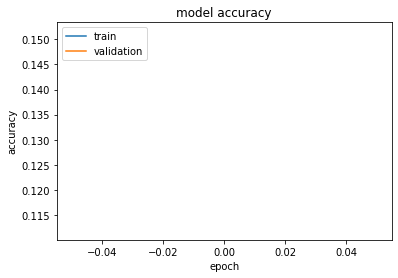

In [ ]:
# #review model accuracy by epochs
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

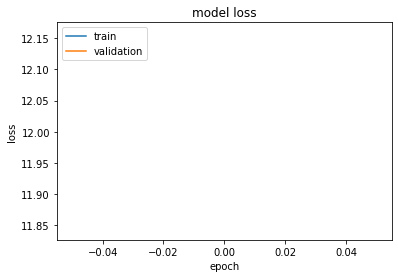

In [ ]:
# #review model loss by epochs
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

clf.fit(x_train.reshape(1,-1), y_train.reshape(1,-1))

# y_pred = clf.predict(y_train)
# y_pred = (y_pred > 0.5) #greater than 0.50 on scale 0 to 1
# #print(y_pred)
# print("classification accuracy:", sum(pred_eval) / len(pred_eval))


In [ ]:
#Making confusion matrix that checks accuracy of the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, x_val)
print(cm)

In [ ]:
import sklearn





#Making confusion matrix that checks accuracy of the model
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)


# # y_test = yval
# # y_pred = ytrain
# # x_test = xval

# prediction = model.predict(xval)
# #prediction = model.predict(x_test)
# # conf_matrix = sklearn.metrics.confusion_matrix(x_test, y_test)
# # print(conf_matrix)


# print(metrics.confusion_matrix(x_test, y_test))

# print(metrics.classification_report(x_test, y_test))

ValueError: ignored

In [ ]:

# history = model.fit(x_train, y_train,
#                     validation_data=(x_val, y_val),
#                     epochs=1,
#                     verbose = 1,
#                     batch_size=200)

# train = model.evaluate(x_train, y_train, verbose = 1)
# score = model.evaluate(x_val, y_val, verbose =0)

#prediction = model.predict(x_test) where is x_test coming from? can't find it. 


print('Train accuracy:', train[1])
print('Valication loss:', score[0])
print('Validation accuracy:', score[1])

NameError: ignored

In [ ]:
# Convert predictions
predictions_labels = prediction.copy()
pred_labels_1D = []
labels_1D = []
for i in range(len(prediction)):
    for j in range(2):
        if prediction[i][j] > 0.5:
            predictions_labels[i][j] = 1
        else:
            predictions_labels[i][j] = 0
    if prediction[i][0] > 0.5:
        pred_labels_1D.append(-1)
    else:
        pred_labels_1D.append(1)
    if y_test[i, 0] == 1: #.iloc deleted this
        labels_1D.append(-1)
    else:
        labels_1D.append(1)

pred_eval = [int(labels_1D[i] == pred_labels_1D[i]) for i in range(len(labels_1D))]
print("classification accuracy:", sum(pred_eval) / len(pred_eval))

conf_matrix = sklearn.metrics.confusion_matrix(labels_1D, pred_labels_1D)
print(conf_matrix)

classification accuracy: 0.11178537208559565
[[  18    0]
 [2781  332]]


array([[0.10712871, 0.01159143, 0.00391222, ..., 0.46521088, 0.00320926,
        0.77347356],
       [0.10712871, 0.01159143, 0.00391222, ..., 0.46521088, 0.00320926,
        0.77347356],
       [0.10712871, 0.01159143, 0.00391222, ..., 0.46521088, 0.00320926,
        0.77347356],
       ...,
       [0.10712871, 0.01159143, 0.00391222, ..., 0.46521088, 0.00320926,
        0.77347356],
       [0.10712871, 0.01159143, 0.00391222, ..., 0.46521088, 0.00320926,
        0.77347356],
       [0.10712871, 0.01159143, 0.00391222, ..., 0.46521088, 0.00320926,
        0.77347356]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_val, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_val, y_pred_bool))